<a href="https://colab.research.google.com/github/tmannem/CovidPOC/blob/master/Covid_Estimation_Using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#What do you understand as Time series data?

#1) In time series data -- it is like time = indep variable, dep variable
#Y(t) = f(Y(t-n))

#2) Time series data should be handled at equal / regular time intervals
# Monthly, Yearly, Quarterly, Weekly, Daily, Hrly, Minute, Second --- whatever granular 
# Regular

#3) Time series where dep variable is function of both time and other indep variable
#is out of syllabus -- we are not going to discuss

In [0]:
############### THERE ARE FEW PROPERTIES OF TIME SERIES
## Time series can have --- 
##1) TREND (optional)--- Uptrend or downtrend
##2) Seasonality (Optional) ----- Systematic Up and down spikes at definite time interval (<=1 yr)
##3) Cyclicity (Optional) ------- Unsystematic up and down spikes (Recession)
## 4) Irregular component ( MANDATORY) --- NOISE 

### This irregular components are very difficult to account for in prediction
### U R BOUND TO HAVE MISTAKES IN FORECASTING
### Forecasting accuracy is not going to be good ( be comfortable)

In [0]:
### ARIMA ()
################## PROPHET 
################## XGBOOST / RANDOM FOREST
################## LSTM

In [0]:
########################
### Step1) Covert date column to date-datatype 
### Step2) Plot teh time series
### Step3) Pre-processing of time series data -- 
          # a) Aggregating the data at higher level to reduce fluctuations 
          # b) Take logarithm of time series
########################## ARIMA = AR(p) + Integrated(d) + MA(q) --- our job now is finding values of these parameters
### Step4) Check if the given time series is stationary (Const Mean and Const Variance)
###         using Augmented Dickey Fuller Test (ADF)
### Step5) If the time series is non stationary --- convert that to stationary using a method
###         known as differencing
### Step6) We will find out values of AR model (p=?) from PACF graph,
###           We will find out values of MA model (q=?) from ACF graph
#### Step7) Once we find out the value of p,d,q ---- we will use that to do prediction
#### Step8) We bring back the data into original scale

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### EURO EXCHANGE rate vs USD
covid_data_df = pd.read_csv('/var/data/full_data.csv')
covid_data_df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [0]:
## Step1
covid_data_df['date'] = pd.to_datetime(covid_data_df['date'])


In [0]:
covid_data_df = covid_data_df[covid_data_df['location']=='World']
#df2date = df2.groupby(['date','location'])[['date','total_deaths']]

#df2DateGrouped=pd.DataFrame(df2date)
#df2.to_csv('groupedData1.csv')
#df2['date'] = pd.to_datetime(df2['date'])
covid_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 8472 to 8566
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          95 non-null     datetime64[ns]
 1   location      95 non-null     object        
 2   new_cases     95 non-null     int64         
 3   new_deaths    95 non-null     int64         
 4   total_cases   95 non-null     int64         
 5   total_deaths  95 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 5.2+ KB


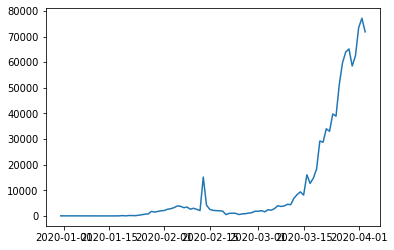

In [0]:
## Step2 - plot
covid_data_df= covid_data_df[covid_data_df['new_cases'] != 0]
covid_data_df = covid_data_df.set_index(['date'])
ts = covid_data_df['new_cases']
plt.plot(ts)

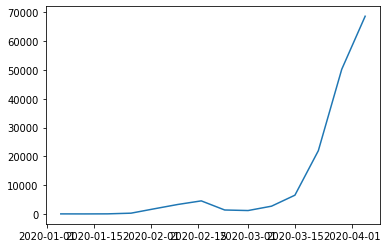

In [0]:
#Pre-processing of time series data -- 
# a) Aggregating the data at higher level to reduce fluctuations 

# As you go granular in time series ---- ur prediction accuracy will go down
# as you keep on aggregating --- your accuracy will go up
ts_weekly = ts.resample('W').mean()
plt.plot(ts_weekly)

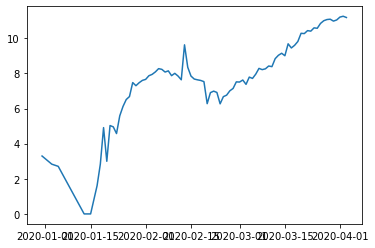

In [0]:
### BOX JENKINS =====> YOU CAN READ SEPARATELY
# b) Take logarithm of time series
#ts.loc[(ts!=0).any(1)]
ts_log = np.log(ts)
plt.plot(ts_log)

In [0]:
### ARIMA MODEL REQUIRES THE DATA TO BE STATIONARY
### Any given time series is likely to be non-stationary

### WHATEVER THE TIME SERIES --- IF WE DO a K-th order shifting (differencing - differentiation) of the time series
### We are eventually going to get a stationary time series

In [0]:
### AUGMENTED DICKEY FULLER TEST is a hypothesis testing done on the time series
## to check if the mean is const or not

#The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
#root, with the alternative that there is no unit root.

## Null hypothesis = Time series is non stationary
## Alternate hypothesis = Time series stationary

In [0]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts_log)
print("p-value of test : " + str(adf_result[1]))
#adf_result

p-value of test : 0.5375240696796012


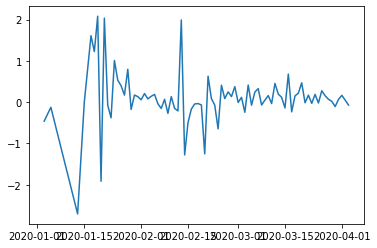

In [0]:
### DIFFERENCING OF THE TIME SERIES
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [0]:
ts_log_diff.dropna(inplace=True)
ts_log_diff.head()

date
2020-01-03   -0.462624
2020-01-05   -0.125163
2020-01-13   -2.708050
2020-01-15    0.000000
2020-01-17    1.609438
Name: new_cases, dtype: float64

In [0]:
adf_result = adfuller(ts_log_diff)
print("p-value of test : " + str(adf_result[1]))
#adf_result

p-value of test : 2.6848666022158674e-19


In [0]:
########### ACF ( Auto correlation Function)

########### PACF ( Partial Auto Correlation Function)

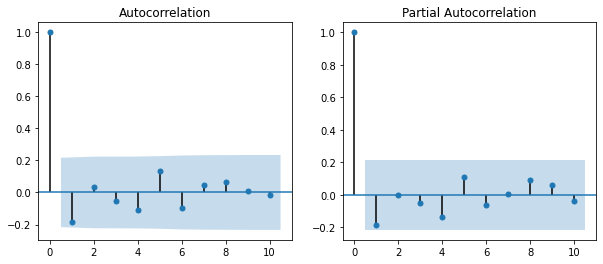

In [0]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,ax = plt.subplots(1,2,figsize = (10,4))

plot_acf(ts_log_diff.values,lags=10,ax = ax[0])
plot_pacf(ts_log_diff.values,lags=10,ax=ax[1])
plt.show()

In [0]:
# RULE TO FIND OUT THE VALUES Of AR(p) and MA(q)
# p = Where PACF graph intersects the X axis = 2
# q = Where ACF graph intersects the blue region = 2
# d = 1

In [0]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(ts_log,order=(2,1,2)) # p=2, I = 1, q = 2
results_arima = model_arima.fit()
print(results_arima.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                   82
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -81.119
Method:                       css-mle   S.D. of innovations              0.651
Date:                Sun, 05 Apr 2020   AIC                            174.238
Time:                        00:40:26   BIC                            188.679
Sample:                             1   HQIC                           180.036
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1010      0.053      1.893      0.062      -0.004       0.205
ar.L1.D.new_cases     0.2082      0.927      0.225      0.823      -1.609       2.025
ar.L2.D.new_cases     0.

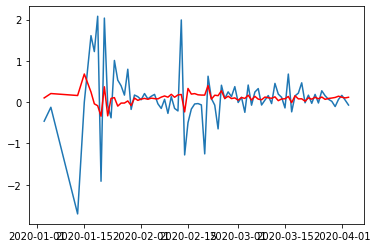

In [0]:
plt.plot(ts_log_diff)
plt.plot(results_arima.fittedvalues,color = 'red')

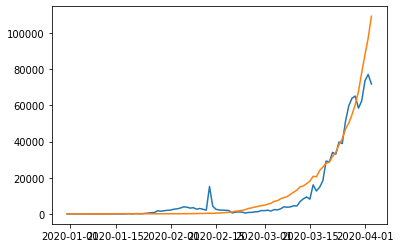

In [0]:
########## Series with the ARIMA predicted values ( Are in difference scale)
ts_predictions = pd.Series(results_arima.fittedvalues)

######### Cum-sum of the predictions
ts_predictions_cumsum = ts_predictions.cumsum()

######### Pandas series with all values as the first value
ts_predictions_in_log_scale = pd.Series(ts_log.iloc[0],index=ts_log.index)

######### Adding the cumsum with the dummy column
ts_predictions_in_log_scale = ts_predictions_in_log_scale.add(ts_predictions_cumsum,fill_value=0)

######## Exponential of the log values
ts_predictions_in_orig_scale = np.exp(ts_predictions_in_log_scale)

####### Weekly original values
plt.plot(ts)

####### weekly values predictions
plt.plot(ts_predictions_in_orig_scale)

In [0]:
ts_log.shape

(83,)

In [0]:
results_arima.forecast(steps = 24)[0]

array([11.3209755 , 11.42527645, 11.53517537, 11.63871456, 11.74213809,
       11.84416439, 11.94587475, 12.04721763, 12.14841578, 12.24950444,
       12.35053906, 12.45153878, 12.55251957, 12.65348887, 12.7544517 ,
       12.8554107 , 12.95636751, 13.05732303, 13.15827781, 13.25923216,
       13.36018626, 13.46114021, 13.56209408, 13.6630479 ])

In [0]:
################# TRAIN - TEST CREATION
#What code to write to divide data into train & test
#train_test_split() ----- randomly between train & test --- sequence is of extreme importance

#### BACKTESTING 

train_data_size = ts_log.shape[0] - 10
train,test = ts_log[0:train_data_size], ts_log[train_data_size:ts_log.shape[0]]

#developing model on train data
#and 
#test on test data --- is that gonna work here? if not what is way out?
#If I have to predict for a time instance t --- I need actual values of t-1, t-2 etc
#AR => Y(t+1) = m1.Y(t) + m2. Y(t-1) [ Actual value sof Y at time t and t-1 ....]
#MA => Y(t+1) = z1.E(t) + z2.E(t-1)

######### IN ARIMA, TYPICALLY WE DO A ROLLING PREDICTION

historical_data = [x for x in train]
predictions = list()

print("Printed and Actual Comparison\n")
for  t in range(len(test)):
    model_arima2 = ARIMA(historical_data,order = (2,1,2))
    model_fit = model_arima2.fit()
    forecasted_data = model_fit.forecast(steps=1) # Forecast function will transform teh data into original scale
    # Forecast for current
    predictions.append(forecasted_data[0][0])    
    # Adding actual back to train
    historical_data.append(test[t])
    print("Prediction = " + str(round(np.exp(forecasted_data[0][0]),3)) + " And " + " Original= " + str(round(np.exp(test[t]),3)))
    

################ PREDICTION ACCURACY --- RMSE , MAPE

Printed and Actual Comparison

Prediction = 43374.733 And  Original= 38927.0
Prediction = 44249.608 And  Original= 51204.0
Prediction = 55120.304 And  Original= 59718.0
Prediction = 65740.093 And  Original= 63937.0
Prediction = 71103.252 And  Original= 65162.0
Prediction = 73406.768 And  Original= 58487.0
Prediction = 67719.268 And  Original= 62443.0
Prediction = 70439.526 And  Original= 73512.0
Prediction = 81615.916 And  Original= 77128.0
Prediction = 86929.249 And  Original= 71813.0


In [0]:
### ERRRO - RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,predictions))

0.12146471149194804

In [0]:
mape = np.mean(abs((test - predictions)/test))
mape

0.009533352054094434

In [0]:
accuracy = 1 - mape
accuracy

0.9904666479459056